# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [120]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [121]:

df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace = True)
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 Math


How many years of data are logged in our dataset? 

In [122]:
#b = df.groupby("YEAR")#["AVG_MATH_4_SCORE"]
print(df['YEAR'].nunique())
#sum(b.nunique())

13


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [123]:
df_ = df.set_index('STATE')


print(df_.loc["MICHIGAN"][["AVG_MATH_4_SCORE"]].mean())
print(df_.loc["OHIO"][["AVG_MATH_4_SCORE"]].mean())

AVG_MATH_4_SCORE    234.363636
dtype: float64
AVG_MATH_4_SCORE    239.454545
dtype: float64


Ohio has a higher average outcome

Find the average for your outcome score across all states in 2019

In [124]:

b= df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean()
print(b)


YEAR
1990    213.000000
1992    218.418605
1996    224.000000
2000    223.976744
2003    234.000000
2005    237.169811
2007    239.207547
2009    239.547170
2011    240.490566
2013    241.962264
2015    240.415094
2017    239.433962
2019    239.943396
Name: AVG_MATH_4_SCORE, dtype: float64


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [125]:
c = df.groupby("STATE")["AVG_MATH_4_SCORE"].max()
print(c)

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [126]:

df['REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,REVENUE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.661510,2.025197
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,4.837699,2.132082
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.877685,2.184247
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,4.997299,2.732512
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,5.199137,2.680986


Feature engineering justification:Made changes in order to obeserve how revenue and instruction expenditure can affect scores independent of the size of the state, and actually based on a per capita metric.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th grade math score')

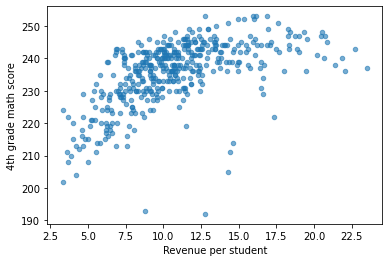

In [127]:
df.plot.scatter(x='REVENUE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Revenue per student')
plt.ylabel('4th grade math score')

Thre is a correlation betweeen the average score and the revenue per students , however, it presents diminishing returns as the revenue increases

**Visualization 2**

Text(0, 0.5, '4th grade math score')

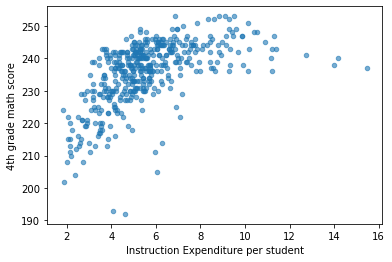

In [128]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure per student')
plt.ylabel('4th grade math score')

Thre is a correlation betweeen the average score and the instruction expenditure per student , however, it presents diminishing returns as the expenditure increases

Text(0, 0.5, '4th grade math score')

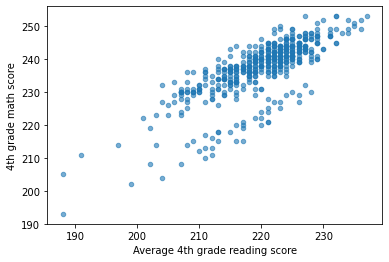

In [129]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Average 4th grade reading score')
plt.ylabel('4th grade math score')

There is a very linear correlation between the reading score for 4th graders and the math score for 4th graders, however there is still a significant amount of outliers.

Text(0, 0.5, '4th grade math score')

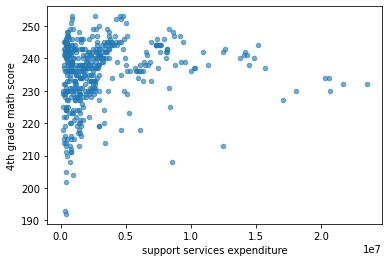

In [130]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('support services expenditure')
plt.ylabel('4th grade math score')

There appears to be no clear relationship between support services expenditure and 4th grade math scores 

Text(0, 0.5, '4th grade math score')

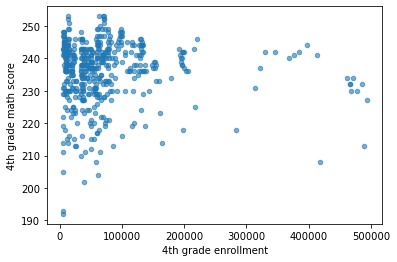

In [131]:
df.plot.scatter(x='ENROLL_4', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th grade enrollment')
plt.ylabel('4th grade math score')

There appears to be no clear correlation between 4th grade enrollment and 4th grade math scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
 X =df[['AVG_READING_4_SCORE', 'INSTRUCTION_EXPENDITURE_PER_STUDENT','REVENUE_PER_STUDENT']].dropna()
y= df.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace=True)

In [134]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [135]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [136]:
# create your model here
model = LinearRegression()

In [137]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7634312833740088

In [138]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [139]:
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.27942950716637566
3.63064633444745
4.886740422737172


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

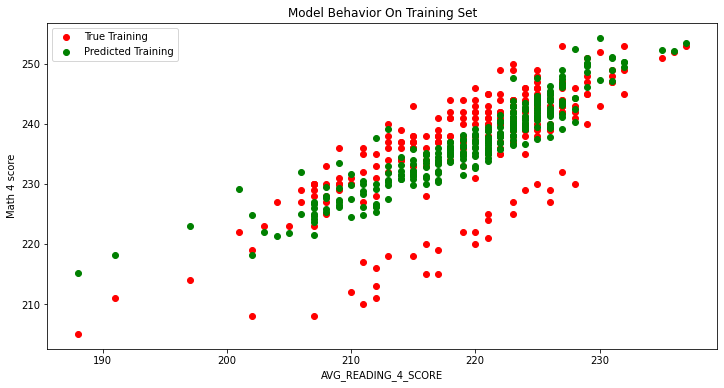

In [140]:


col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

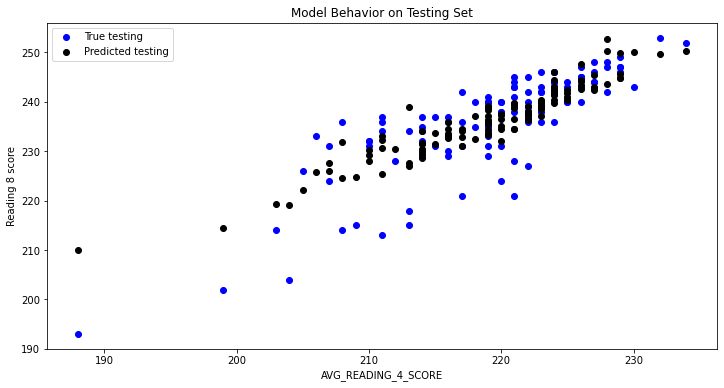

In [141]:


col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 8 score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

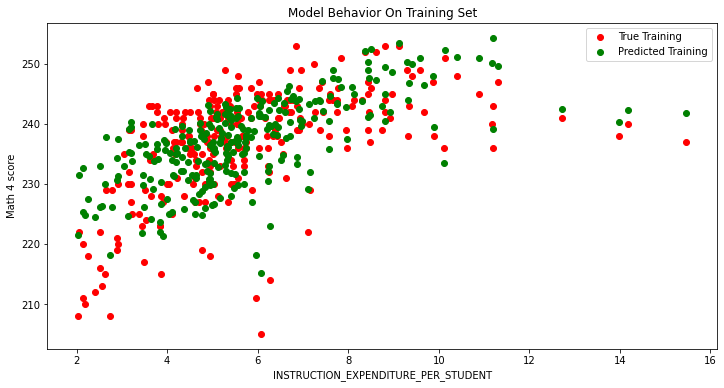

In [142]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

Text(0.5, 1.0, 'Model Behavior on Testing Set')

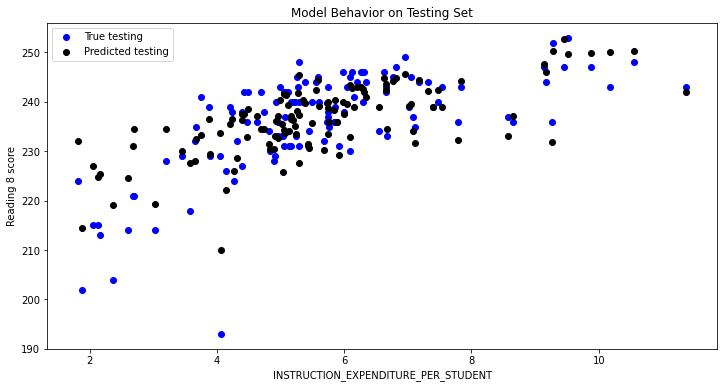

In [143]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 8 score')
plt.title("Model Behavior on Testing Set")

Throughout this experiment we studied the factors that contributed the most to the 4th grade math scores in the provided data, and how well we could develop a model to predict the score given those parameters. After several test it was apparent that the 4th grade reading scores had the most fitting correlation to the 4th grade math scores and performed the best when inputed to the linear regression. There was also a relatively strong correlation  between the 4th grade math scores and the factors: instruction expenditure per student and revenue per student. Although there was a correlation it was not completely linear and demonstrated diminshing returns on score changes as the input values increased. Both factors still performed reasonably well in the model, however, they could have shown better results if tested in a model that utilized polynomial regression instead of only linear. For future projects I aim to improve my results by removing extreme outliers and utilizing more than one type of prediction model in order to extract the most accurate prediction possible.